# Covid-19 Twitter Data Analysis

The data was downloaded from the website which is [here](https://spotle.ai/project/COVID19-Twitter-Data-Analysis/5592/10079)

In [1]:
# Required Modules

import re
import emoji
import string
import numpy as np
import pandas as pd
from PIL import Image
from ipywidgets import interact
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

## Custom Function

In [2]:
# These are the required functions, which will be used many times across this notebook

def get_hashtags(word_list):
    tags = list()

    for word in word_list:
        if len(word) != 0 and word[0] == '#':
            tags.append(word)

    return tags

def get_handles(word_list):
    handles = list()

    for word in word_list:
        if len(word) != 0 and word[0] == '@':
            handles.append(word)

    return handles

def get_punctuations(textdata):
    punc = list()
    
    for char in textdata:
        if char in string.punctuation:
            punc.append(char)
            
    return punc

def make_frequency_list(wordlist):
    freq = dict()
    
    for word in wordlist:
        if word in freq.keys():
            freq[word] += 1
        else:
            freq[word] = 1
            
    return freq

def sort_dictionary(dictionary, ascending=True):
    return {key: value for key, value in sorted(dictionary.items(), key=lambda item: item[1], reverse=(not ascending))}

def bar_plot(labels, values, title, xlabel, n):
    plt.title(title)
    
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    
    for i in range(n):
        plt.text(i, values[i], str(values[i]))
    plt.xticks(range(n), labels=labels, rotation=90)
    plt.bar(range(n), height=values)

The below cell loads the data and extracts all the emoji's from the raw data.
Next, it tokenizes the data based on the '\n' character.

In [3]:
raw_data = open('tweets_corona.txt').read()
emojis = [char for char in raw_data if char in emoji.UNICODE_EMOJI]
tmp_data = raw_data.split('\n')

In [4]:
# Tokenizing the data

tokenize = lambda l: l.split()

tokens = []
for tok in tmp_data:
    tokens.extend(tokenize(tok))
print("Total number of tokens in the tweets:", len(tokens))

Total number of tokens in the tweets: 2571185


In [5]:
# Removing all the urls in data

tweet_data = ""
url_count = 0

for tok in tokens:
    if tok[:4] != 'http':
        tweet_data += tok+" "
        continue
    url_count += 1
print("Total number of urls present in the data are:", url_count)

Total number of urls present in the data are: 79840


# Making a Word/Tag cloud

In [6]:
stopwords = set(STOPWORDS)

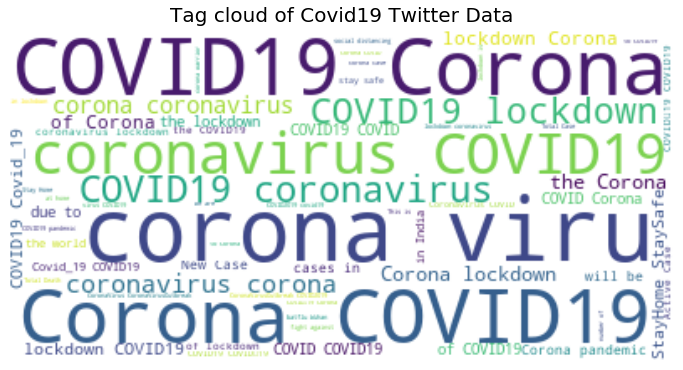

In [7]:
wordcloud = WordCloud(max_words=60, background_color='white', stopwords=stopwords)
wordcloud.generate(tweet_data)

plt.title("Tag cloud of Covid19 Twitter Data", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

plt.savefig('tagcloud1.png', format='png')

In [8]:
image = np.array(Image.open('./twitter.jpg'))

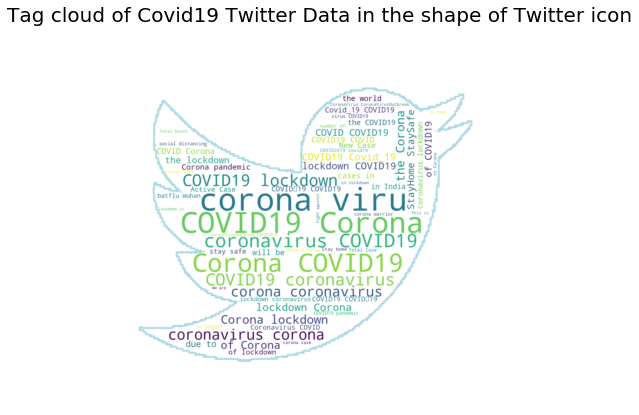

In [9]:
wc = WordCloud(max_words=60, background_color='white', mask=image, stopwords=stopwords, contour_width=10, contour_color='lightblue')
wc.generate(tweet_data)

plt.title("Tag cloud of Covid19 Twitter Data in the shape of Twitter icon", fontsize=20)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')

plt.savefig('tagcloud2.png', format='png')

# Trending hashtags, handles and emoji's

In [10]:
# Separating out hashtags

hashtags = get_hashtags(tokens)
print("Total number of hashtags in the tweets:", len(hashtags))

Total number of hashtags in the tweets: 579859


In [11]:
# Separating out handles

handles = get_handles(tokens)
print("Total number of handles in the tweets:", len(handles))

Total number of handles in the tweets: 59429


In [12]:
# Make a frequency list of hashtags(case sensitive)

hashtag_freq = make_frequency_list(hashtags)
print("Total number of Unique tags:", len(hashtag_freq.keys()))

Total number of Unique tags: 19751


In [13]:
sorted_hashtags_freq = sort_dictionary(hashtag_freq, ascending=False)

In [14]:
print(sorted_hashtags_freq)

{'#COVID19': 47590, '#Corona': 30294, '#lockdown': 22716, '#coronavirus': 21159, '#corona': 19303, '#covid19': 18425, '#Covid19': 8294, '#Covid_19': 6112, '#COVIDー19': 6047, '#StayHome': 4781, '#Lockdown': 4406, '#COVID': 4213, '#CoronaVirus': 3854, '#pandemic': 3740, '#staysafe': 3167, '#Coronavirus': 2964, '#COVID2019': 2953, '#Quarantine': 2849, '#quarantine': 2798, '#stayhome': 2773, '#virus': 2563, '#lockdownextension': 2479, '#covid': 2460, '#socialdistancing': 2439, '#StaySafe': 2350, '#India': 1820, '#batflu': 1531, '#Wuhan': 1518, '#IndiaFightsCorona': 1448, '#coronavirusinindia': 1439, '#CoronavirusOutbreak': 1405, '#covid_19': 1362, '#india': 1281, '#CoronaOutbreak': 1253, '#CoronavirusPandemic': 1222, '#SocialDistancing': 1217, '#CoronaVirusOutbreak': 1126, '#COVIDIOTS': 1114, '#StayHomeStaySafe': 1074, '#health': 1016, '#StayAtHome': 991, '#CoronaUpdatesInIndia': 974, '#WashYourHands': 974, '#CoronaVirusUpdate': 935, '#medtwitter': 927, '#COVID__19': 880, '#Lockdown3': 878

In [15]:
# Top n hashtags

@interact(n=(0, 50, 5))
def plot_hashtag_freq(n):
    labels = list(sorted_hashtags_freq.keys())[:n]
    values = list(sorted_hashtags_freq.values())[:n]

    bar_plot(labels, values, "Top "+str(n)+" trending hashtags on Twitter during this Lockdown", "Hashtags", n)
    
    return

interactive(children=(IntSlider(value=25, description='n', max=50, step=5), Output()), _dom_classes=('widget-i…

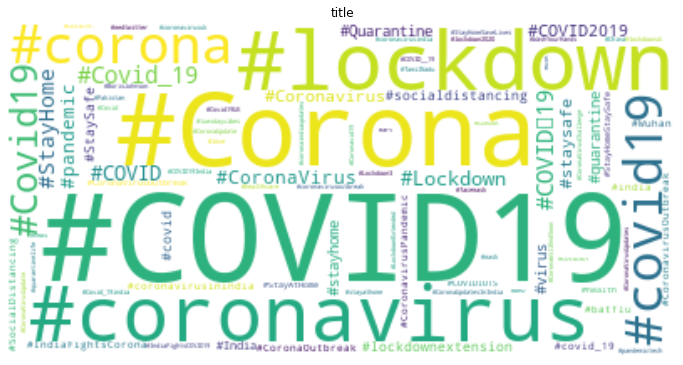

In [16]:
# Word Cloud for the most frequently occuring hashtags

wc_handle = WordCloud(background_color='white')
wc_handle.generate_from_frequencies(sorted_hashtags_freq)

plt.title("title")
plt.axis("off")
plt.imshow(wc_handle, interpolation='bilinear')

plt.savefig('handle_cloud.png', format='png')

In [17]:
# Make a frequency list of hashtags(case insensitive)

hashtags_case_insensitive = list(map(str.lower, hashtags))

hashtag_freq = make_frequency_list(hashtags_case_insensitive)
print("Total number of Unique tags:", len(hashtag_freq.keys()))

Total number of Unique tags: 17453


In [18]:
sorted_hashtags_freq = sort_dictionary(hashtag_freq, ascending=False)

In [19]:
print(sorted_hashtags_freq)

{'#covid19': 74350, '#corona': 50159, '#coronavirus': 28085, '#lockdown': 27634, '#stayhome': 7778, '#covid_19': 7756, '#covid': 7580, '#covidー19': 6137, '#quarantine': 5650, '#staysafe': 5618, '#pandemic': 4311, '#socialdistancing': 3674, '#coronavirusoutbreak': 3270, '#india': 3152, '#covid2019': 3081, '#virus': 2880, '#lockdownextension': 2647, '#indiafightscorona': 2061, '#stayathome': 1828, '#stayhomestaysafe': 1669, '#wuhan': 1628, '#coronavirusinindia': 1571, '#batflu': 1531, '#coronaviruspandemic': 1380, '#health': 1359, '#coronaoutbreak': 1340, '#covid19india': 1226, '#covidiots': 1198, '#lockdown3': 1141, '#coronavirusupdate': 1090, '#washyourhands': 1089, '#coronavirusindia': 1042, '#covid_19india': 1010, '#coronaupdatesinindia': 976, '#quarantinelife': 973, '#news': 951, '#medtwitter': 942, '#covid19.': 933, '#coronavirusupdates': 908, '#covid__19': 904, '#china': 893, '#coronavid19': 815, '#usa': 801, '#mask': 792, '#stayhomesavelives': 768, '#workfromhome': 735, '#indiafi

In [20]:
# Top n hashtags

@interact(n=(0, 50, 5))
def plot_hashtag__uniq_freq(n):
    labels = list(sorted_hashtags_freq.keys())[:n]
    values = list(sorted_hashtags_freq.values())[:n]

    bar_plot(labels, values, "Top "+str(n)+" trending hashtags on Twitter during this Lockdown", "Hashtags", n)
    
    return

interactive(children=(IntSlider(value=25, description='n', max=50, step=5), Output()), _dom_classes=('widget-i…

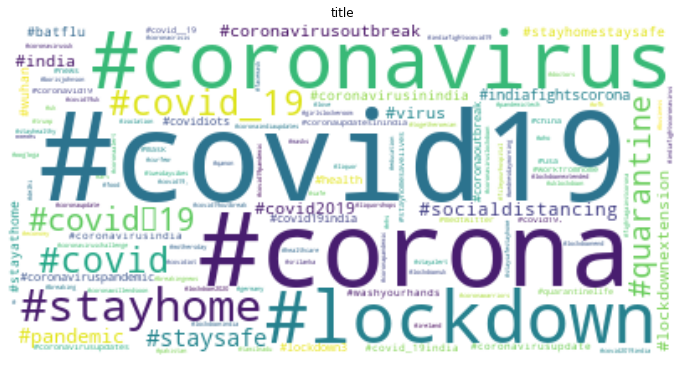

In [21]:
# Word Cloud for the most frequently occuring hashtags

wc_handle = WordCloud(background_color='white')
wc_handle.generate_from_frequencies(sorted_hashtags_freq)

plt.title("title")
plt.axis("off")
plt.imshow(wc_handle, interpolation='bilinear')

plt.savefig('handle_cloud.png', format='png')

In [22]:
# Make a frequency list of handles(case sensitive)

handles_freq = make_frequency_list(handles)
print("Total number of Unique tags:", len(handles_freq.keys()))

Total number of Unique tags: 6485


In [23]:
sorted_handles_freq = sort_dictionary(handles_freq, ascending=False)

In [24]:
print(sorted_handles_freq)

{'@narendramodi': 1407, '@PMOIndia': 1295, '@realDonaldTrump': 831, '@YouTube': 701, '@WHO': 657, '@': 634, '@news_pandemic': 559, '@MoHFW_INDIA': 428, '@AmitShah': 426, '@Olacabs': 348, '@BSYBJP': 289, '@ArvindKejriwal': 286, '@PhocusWire': 258, '@Uber_India': 258, '@BorisJohnson': 240, '@CMOMaharashtra': 238, '@ANI': 236, '@UN': 219, '@NCDCgov': 207, '@DIPR_COVID19': 206, '@NCHD_MEDIA': 198, '@CMofKarnataka': 196, '@sambitswaraj': 188, '@amazon': 186, '@HMOIndia': 184, '@RahulGandhi': 180, '@Kcr': 180, '@Ktr': 180, '@CNN': 176, '@We_Are_Alight': 174, '@NavamiDigital': 168, '@myogiadityanath': 165, '@KTRTRS': 162, '@drharshvardhan': 147, '@aajtak': 141, '@INCIndia': 135, '@capt_amarinder': 133, '@BJP4India': 132, '@himantabiswa': 127, '@ICMRDELHI': 126, '@BBCWorld': 123, '@instagram': 123, '@PIB_India': 121, '@Pinterest': 120, '@WhiteHouse': 119, '@htTweets': 118, '@mani1972ias': 118, '@washingtonpost': 118, '@Addicted2Advent': 117, '@IndiaToday': 113, '@nsitharaman': 111, '@POTUS': 1

In [25]:
# Top n handles

@interact(n=(0, 50, 5))
def plot_handles_freq(n):
    labels = list(sorted_handles_freq.keys())[:n]
    values = list(sorted_handles_freq.values())[:n]

    bar_plot(labels, values, "Top "+str(n)+" trending handles on Twitter during this Lockdown", "Handles", n)
    
    return

interactive(children=(IntSlider(value=25, description='n', max=50, step=5), Output()), _dom_classes=('widget-i…

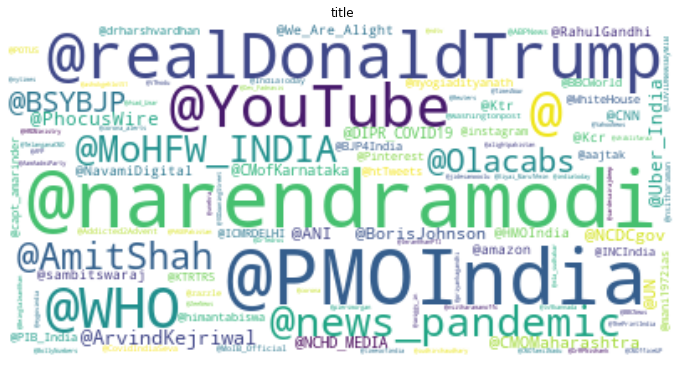

In [26]:
# Word Cloud for the most frequently occuring handles

wc_handle = WordCloud(background_color='white')
wc_handle.generate_from_frequencies(sorted_handles_freq)

plt.title("title")
plt.axis("off")
plt.imshow(wc_handle, interpolation='bilinear')

plt.savefig('handle_cloud.png', format='png')

In [27]:
# Make a frequency list of handles(case insensitive)

handles_case_insensitive = list(map(str.lower, handles))

handles_freq = make_frequency_list(handles)
print("Total number of Unique tags:", len(handles_freq.keys()))

Total number of Unique tags: 6485


The total number of unique handles in case insensitve and case sensitive arrays are the same, so the bar plot we look the same.

In [28]:
# Make a frequency list of emoji's

emoji_freq = make_frequency_list(emojis)
print("Total number of emoji's used:", len(emoji_freq.keys()))

Total number of emoji's used: 563


In [29]:
sorted_emojis = sort_dictionary(emoji_freq, ascending=False)

In [30]:
print(sorted_emojis)

{'😂': 1877, '🙏': 1399, '👇': 1313, '😷': 945, '🤔': 865, '🏻': 792, '👉': 772, '🤣': 673, '\U0001f9a0': 656, '🇳': 552, '🔥': 552, '❤': 540, '🇮': 501, '🔹': 435, '♂': 412, '😭': 402, '🌎': 334, '🏽': 318, '⭐': 309, '😅': 307, '😡': 294, '🏼': 288, '🙄': 285, '✨': 282, '♀': 279, '🇪': 265, '🤦': 256, '©': 255, '💪': 243, '🇰': 238, '🇺': 234, '🇩': 231, '🏾': 225, '🇵': 224, '👍': 221, '🇷': 216, '👏': 212, '🇬': 208, '🇧': 198, '💃': 195, '➡': 194, '😱': 191, '🏠': 189, '👊': 188, '😢': 186, '💐': 181, '🤷': 180, '😉': 177, '😊': 171, '👀': 171, '😁': 168, '🌈': 165, '▶': 165, '😆': 163, '🇭': 158, '🙌': 157, '😄': 156, '🇸': 150, '👌': 150, '😥': 150, '\U0001f9e4': 147, '🌿': 141, '💯': 137, '😌': 134, '🙂': 132, '🇱': 130, '😎': 126, '🚫': 126, '💲': 126, '🌍': 120, '😨': 119, '💙': 118, '👆': 117, '🇦': 115, '📸': 115, '✅': 111, '💥': 111, '😠': 108, '🎉': 104, '🙈': 102, '💚': 102, '😍': 100, '⛔': 99, '🇲': 99, '😳': 99, '☹': 99, '🇫': 96, '\U0001f92f': 96, '‼': 96, '😩': 96, '😀': 93, '\U0001f929': 93, '😃': 93, '🌐': 93, '🌻': 91, '🚨': 90, '✌': 90, '😝': 

In [31]:
# Top n emojis

@interact(n=(0, 50, 5))
def plot_emojis(n):
    labels = list(sorted_emojis.keys())[:n]
    values = list(sorted_emojis.values())[:n]

    bar_plot(labels, values, "Top "+str(n)+" used emojis on Twitter during this Lockdown", "Emoji's", n)
    
    return

interactive(children=(IntSlider(value=25, description='n', max=50, step=5), Output()), _dom_classes=('widget-i…